In [1]:
#import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


# Load cleaned data
stats = pd.read_csv('cleaned_stats.csv')
results = pd.read_csv('cleaned_results.csv')



In [4]:
# 2.1 Descriptive Statistics 

print("Stats summary:")
print(stats.describe())

# Group by season to see evolution
season_summary = stats.groupby('season_start').agg({
    'goals': 'mean',
    'total_pass': 'mean',
    'touches': 'mean',
    'points': 'mean'
}).round(2)
print("\nAverage per season:")
print(season_summary)






Stats summary:
             wins      losses       goals  total_yel_card  total_red_card  \
count  240.000000  240.000000  240.000000      240.000000      240.000000   
mean    14.150000   14.150000   51.070833       61.079167        2.862500   
std      6.022482    5.596846   16.062536       10.078249        1.802442   
min      1.000000    2.000000   27.390000       38.000000        0.000000   
25%     10.000000   10.000000   40.000000       54.000000        1.000000   
50%     12.000000   15.000000   47.000000       60.500000        3.000000   
75%     18.000000   19.000000   61.000000       67.000000        4.000000   
max     32.000000   29.000000  101.610000       94.000000        9.000000   

       total_scoring_att  ontarget_scoring_att  hit_woodwork  att_hd_goal  \
count         240.000000            240.000000    240.000000   240.000000   
mean          513.760375            168.116667     12.283333     9.016667   
std            94.006485             38.748882      4.820950

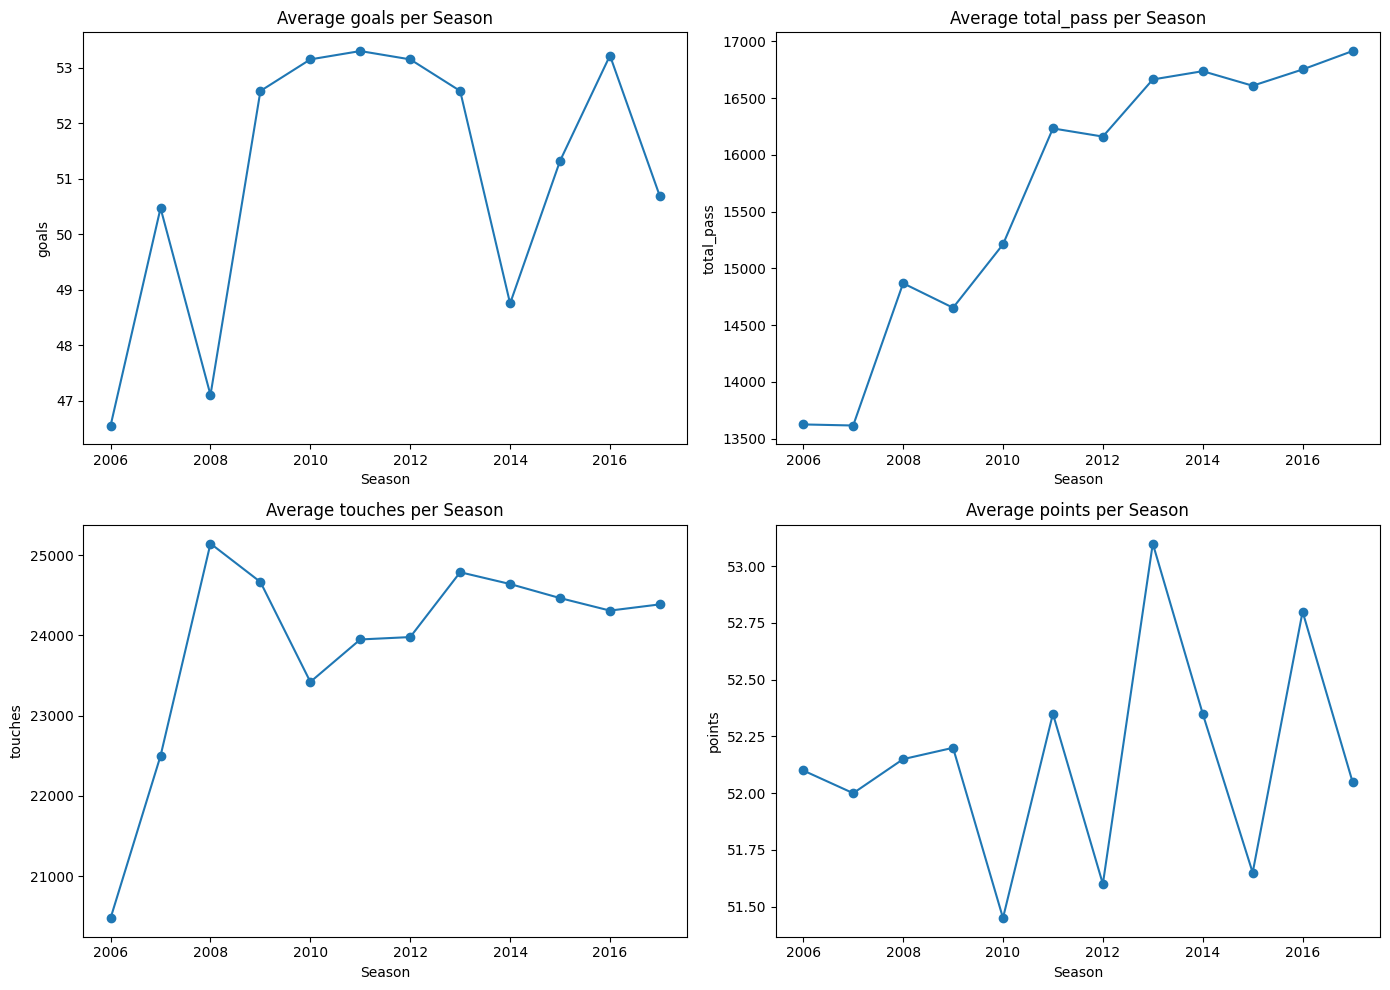

In [5]:
# 2.2 Temporal Trend Analysis 


fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics = ['goals', 'total_pass', 'touches', 'points']
for ax, metric in zip(axes.flatten(), metrics):
    stats.groupby('season_start')[metric].mean().plot(ax=ax, marker='o')
    ax.set_title(f'Average {metric} per Season')
    ax.set_xlabel('Season')
    ax.set_ylabel(metric)
plt.tight_layout()
plt.savefig('temporal_trends.png')
plt.show()



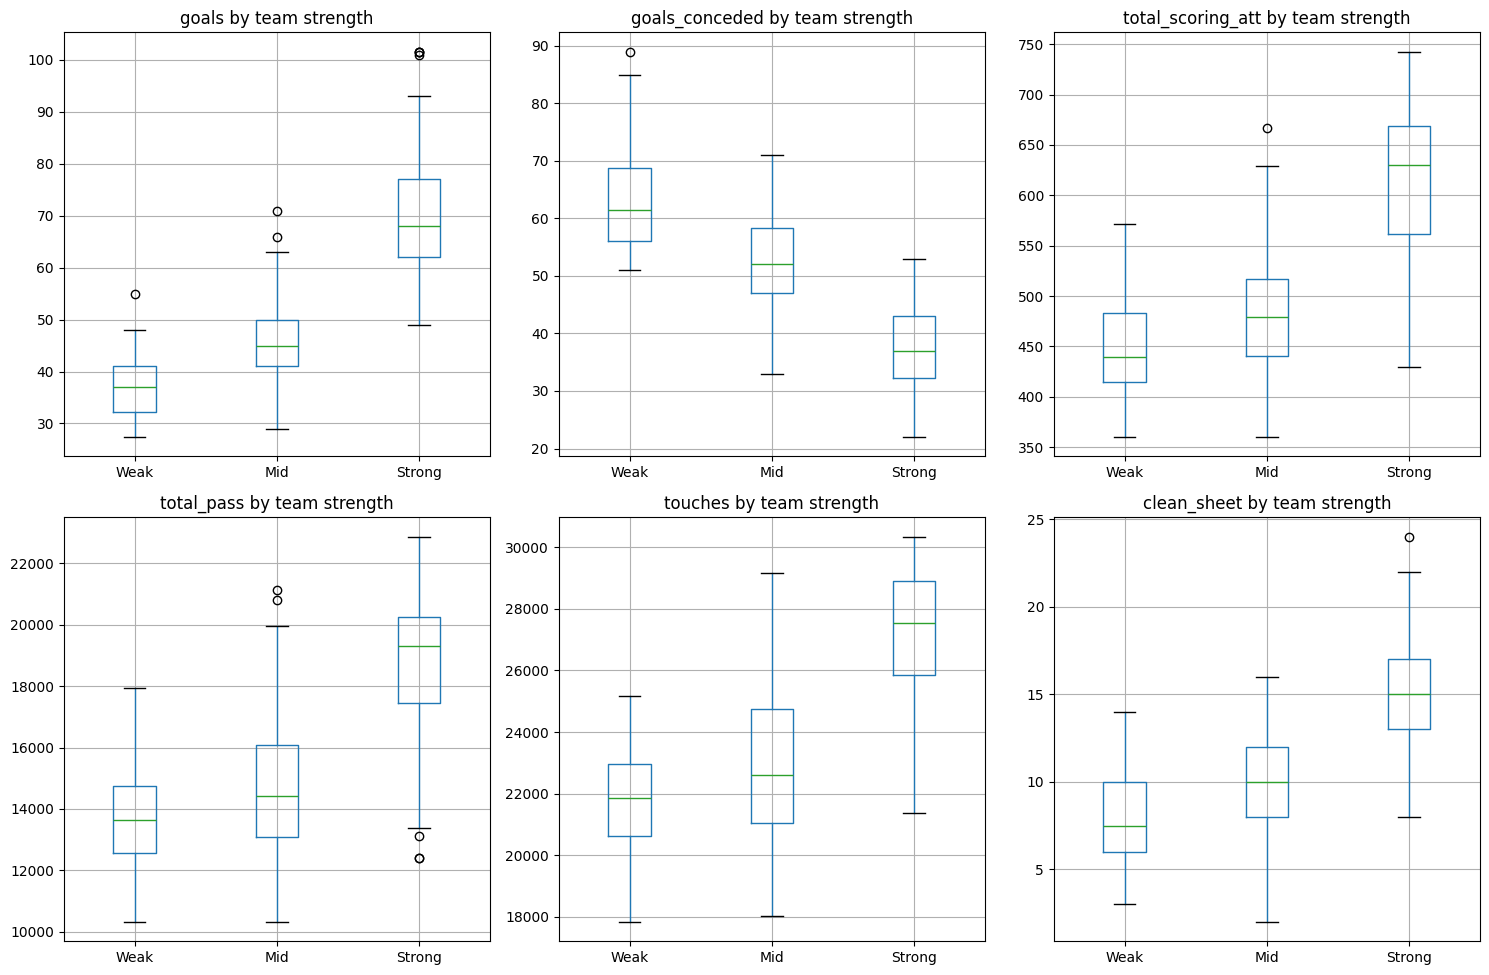

In [6]:
# 2.3 Team Performance Comparisons  

# Classify teams based on final points (we don't have final position directly,
# but we can use points quantiles as proxy)
stats['strength'] = pd.cut(stats['points'],
                            bins=[0, 40, 60, 100],
                            labels=['Weak', 'Mid', 'Strong'])

# Compare key metrics
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
metrics = ['goals', 'goals_conceded', 'total_scoring_att', 'total_pass', 'touches', 'clean_sheet']
for ax, metric in zip(axes.flatten(), metrics):
    stats.boxplot(column=metric, by='strength', ax=ax)
    ax.set_title(f'{metric} by team strength')
    ax.set_xlabel('')
plt.suptitle('')
plt.tight_layout()
plt.savefig('team_strength_comparison.png')
plt.show()



